In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [2]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root="data",
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

100%|██████████| 26421880/26421880 [00:02<00:00, 10342749.95it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 171446.57it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3240524.34it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23418955.52it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image Shape: {image.shape} -> [color channels, height, width]") # Our images are gray_scale!
print(f"Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Label: Ankle boot


(-0.5, 27.5, 27.5, -0.5)

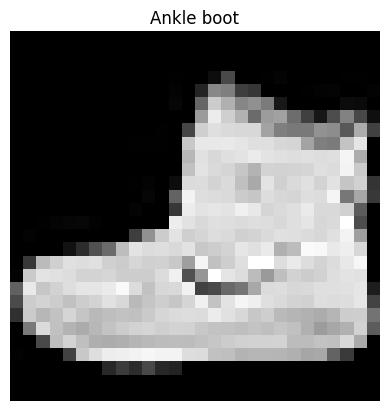

In [9]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

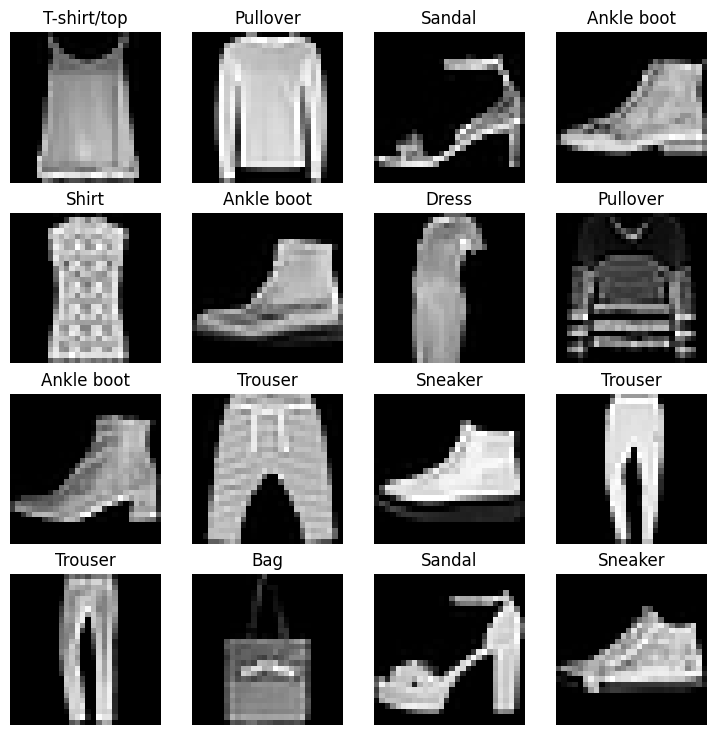

In [10]:
# Show more images

plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_index = torch.randint(1, len(train_data), size=[1]).item()

  plt.subplot(rows, cols, i)

  image, label = train_data[random_index]

  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [11]:
# Now our data is in the form of PyTorch dataset, to transform it to mini-batches, we need a Data-Loader
# It also helps to iterate over batches!

from torch.utils.data import DataLoader

In [12]:
BATCH_SIZE = 32

train_data_loader = DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [13]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7a0f79797ee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a0f771c12a0>)

In [14]:
print(f"Length of Training Data loader: {len(train_data_loader)}, Batches of {train_data_loader.batch_size}")
print(f"Length of Testing Data loader: {len(test_data_loader)}, Batches of {test_data_loader.batch_size}")

Length of Training Data loader: 1875, Batches of 32
Length of Testing Data loader: 313, Batches of 32


In [15]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape # [Batch_Size, Color_Channels, Height, Width] Color Channels First!

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

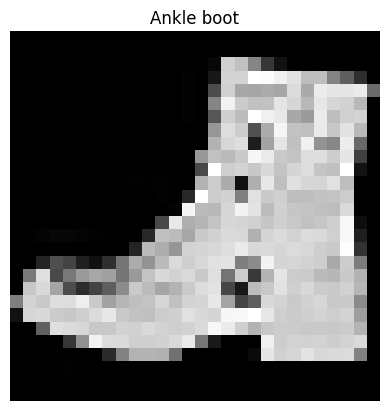

In [16]:
# Visualizing Images in the batch

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx].squeeze(), train_labels_batch[random_idx]
plt.imshow(img, cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [17]:
class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.model_layers = nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=input_shape,
                                                out_features=hidden_units),
                                      nn.Linear(in_features=hidden_units,
                                                out_features=output_shape))

  def forward(self, x):
    return self.model_layers(x)

In [18]:
model = FashionMNISTModel(input_shape=784,
                          hidden_units=8,
                          output_shape=len(class_names))

next(model.parameters()).device

device(type='cpu')

# Helper Functions

In [19]:
# import requests
# from pathlib import Path

# if Path("HelperFunctions.py").is_file():
#   print("Helper Functions already exists, skipping downloading")
# else:
#   print("downloading HelperFunctions.py")

#   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

#   with open("HelperFunctions.py", "wb") as f:
#     f.write(request.content)

In [20]:
# Picking a loss function and an optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.0005)

In [21]:
# from HelperFunctions import accuracy_fn

def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = correct / len(y_true) * 100

  return accuracy

# Timer Function

In [22]:
from timeit import default_timer as timer

def display_train_time(start: float,
                       end: float,
                       device: torch.device=None):
  total_time = end-start
  print(f"Train time on device {device}: {total_time:.3f} seconds")

  return total_time

In [23]:
start = timer()
end = timer()

display_train_time(start, end, device="cpu")

Train time on device cpu: 0.000 seconds


4.753100000698396e-05

In [24]:
# Import tqdm for progress bar (Wow!!!)
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start_time_on_cpu = timer()

# Set the number of epochs
epochs = 10

# Training / Testing loop
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}.\n--------------------------------------")

  # Training
  training_loss = 0 # Commulative loss per batch, and devide it by the number of batches to get the average loss per batch

  for batch, (x, y) in enumerate(train_data_loader):
    model.train()

    # Forward Pass
    y_pred = model(x)

    # Loss
    loss = loss_fn(y_pred, y)
    training_loss+=loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # optimizer step step step
    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at {batch*len(x)}/{len(train_data_loader.dataset)} samples") # train_data_loader.dataset (returns the number of samples)

  # After looping over batches, devide the training loss over the number of batches to get the averge loss per batch
  training_loss/=len(train_data_loader) # train.data_loader (returns the number of batches)

  # Testing
  testing_acc, testing_loss = 0, 0

  model.eval()
  with torch.inference_mode():
    for x, y in test_data_loader:
      # Forward Pass
      y_test_pred = model(x)

      # Loss
      testing_loss+=loss_fn(y_test_pred, y)

      # Accuracy
      testing_acc += accuracy_fn(y_test_pred.argmax(dim=1), y)

    testing_loss/=len(test_data_loader)
    testing_acc/=len(test_data_loader)

  print(f"Training loss: {training_loss:.3f} | Test Loss: {testing_loss:.3f} | Testing Accuracy: {testing_acc:.2f}%")

# Compute the time of the training
test_start_time_on_cpu = timer()

display_train_time(train_start_time_on_cpu, test_start_time_on_cpu, device=next(model.parameters()).device)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 0.
--------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Training loss: 0.756 | Test Loss: 0.561 | Testing Accuracy: 80.63%
epoch: 1.
--------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Training loss: 0.503 | Test Loss: 0.507 | Testing Accuracy: 82.09%
epoch: 2.
--------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Training loss: 0.467 | Test Loss: 0.486 | Testing Accuracy: 83.05%
epoch: 3.
--------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Training loss: 0.44

97.37192138900002

In [28]:
torch.manual_seed(42)

def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn):

  model.eval()

  loss, acc = 0, 0

  with torch.inference_mode():

    for x, y in tqdm(data_loader):

      # Forward Pass
      y_pred = model(x)

      # Loss
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(torch.argmax(y_pred, dim=1), y)

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"Model Name" : model.__class__.__name__,
          "Model Loss" : loss.item(),
          "Model Accuracy" : acc}

In [29]:
# Testing the model
model_results = eval_model(model, test_data_loader, loss_fn, accuracy_fn)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModel',
 'Model Loss': 0.4670223295688629,
 'Model Accuracy': 83.83586261980831}